In [1]:
# example for simple & multiple linear regression

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# reading files
df = pd.read_csv('./Downloads/ML/AllCodes/Regression/50_Startups.csv');
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# we will predict the profit in this particular use case, so profit will become dependent variable and other will be independent variables
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
# divide the data in to dependents vs independents
# X = df.drop('Profit').values;
# y = df['Profit'].values;
X = df.iloc[:,:-1].values;
y = df.iloc[:,-1].values;
print(X, 'independent variable X')
print(y, 'dependent variable y')


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [5]:
# feature encoding - OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 3rd column is 'categorical' data -> contains categories or labels not numerical value
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder = 'passthrough')

X = np.array(ct.fit_transform(X))

print(X, 'Dependent variable X after hot encoding')





[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [6]:
# train test split
from sklearn.model_selection import train_test_split

# can also pass param as train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

X_train_len = len(X_train)
X_test_len = len(X_test)
print("X_train_len",X_train_len)
print("X_test_len",X_test_len)

X_train_len 40
X_test_len 10


In [7]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# observer we did fit transform for training data and only transform on test data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [40]:
# Create LR Model

from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predictions

y_pred = regressor.predict(X_test)

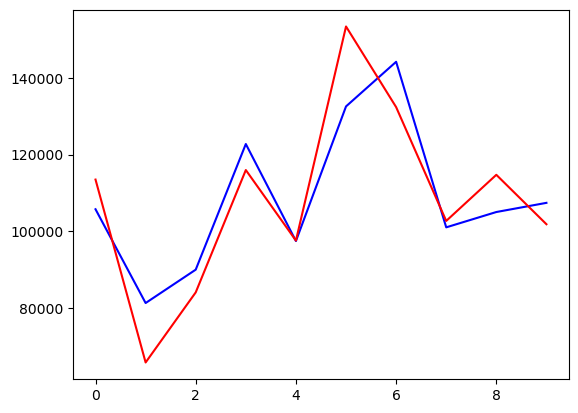

In [42]:
# plotting of y_test vs y_pred

plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

In [45]:
# out of the box predictions

data = [[0.0,0.0, 1.0, 160000, 130000, 350000]]
new_df = pd.DataFrame(data)
new_df = sc.transform(new_df)
single = regressor.predict(new_df)
print("Predicted profit by Linear Regression model is", single)


Predicted profit by Linear Regression model is [185024.90407036]
